# Sandip Shaw

## BREAST CANCER DETECTION MACHINE LEARNING PROJECT

#### Our goal is to create an ML model to classify malignant and benign tumor after extracting the features of breast cancer patient cells and normal person cells

In [2]:
# IMMPORT NECESSARY LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# TO DISPLAY EVERY COLUMN

pd.set_option('display.max_columns',None)

In [53]:
# READ THE DATA

df = pd.read_csv('breast_cancer_dataframe.csv')
df.head()

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.shape

(569, 32)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               569 non-null    int64  
 1   mean radius              569 non-null    float64
 2   mean texture             569 non-null    float64
 3   mean perimeter           569 non-null    float64
 4   mean area                569 non-null    float64
 5   mean smoothness          569 non-null    float64
 6   mean compactness         569 non-null    float64
 7   mean concavity           569 non-null    float64
 8   mean concave points      569 non-null    float64
 9   mean symmetry            569 non-null    float64
 10  mean fractal dimension   569 non-null    float64
 11  radius error             569 non-null    float64
 12  texture error            569 non-null    float64
 13  perimeter error          569 non-null    float64
 14  area error               5

In [8]:
df.describe()

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,284.000000,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,164.400426,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,142.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,284.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,426.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,568.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [9]:
df.isnull().sum().sum() # THE DATA HAS NO NULL VALUES

0

In [10]:
# EXTRACTING EACH FEATURE COLUMN

features=df.columns  
features

Index(['Unnamed: 0', 'mean radius', 'mean texture', 'mean perimeter',
       'mean area', 'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [11]:
# DROPPING THE FIRST COLUMN WHICH IS UNNAMED AS WE ALREADY HAVE INBUILT SERIAL COUNTER

new_df = df.drop(features[0],axis=1)
new_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


# DATA VISUALIZATION

C:\Users\sandi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

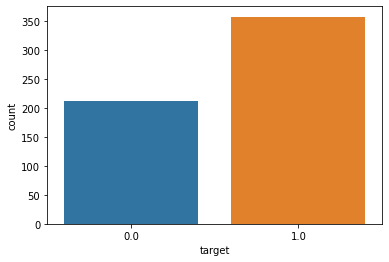

In [12]:
# COUNTING THE NUMBER OF BENIGN AND MALIGNANT TUMOR

sns.countplot(new_df['target'])

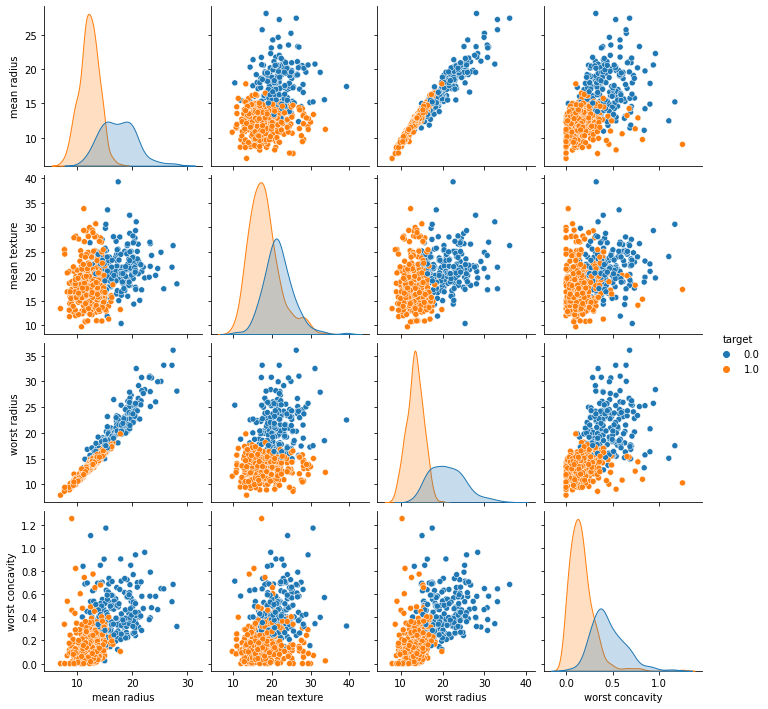

In [13]:
# PAIR PLOT

sns.pairplot(new_df,hue='target',vars=['mean radius','mean texture','worst radius','worst concavity'])

C:\Users\sandi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean radius', ylabel='count'>

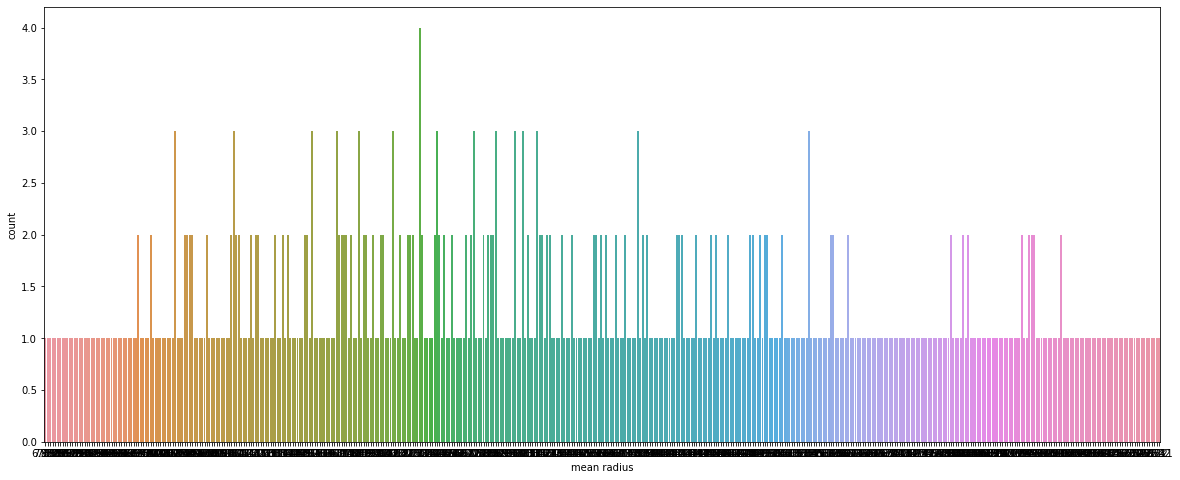

In [14]:
# COUNT THE NUMBER OF SAMPLES IN MEAN RADIUS

plt.figure(figsize=(20,8))
sns.countplot(df['mean radius'])

WE CAN SEE MAXIMUM SAMPLES MEAN RADIUS IS EQUAL TO 1

<AxesSubplot:>

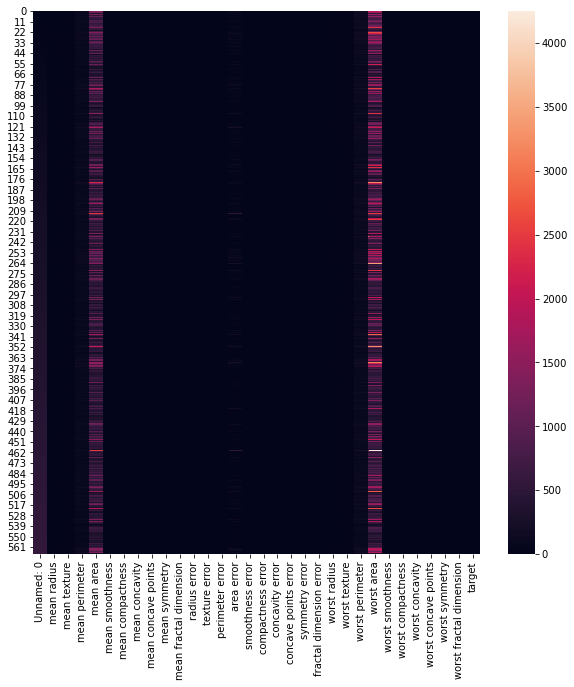

In [50]:
# HEAT MAP

plt.figure(figsize=(10,10))
sns.heatmap(df)

In the heatmap we can see the variety of different feature’s value. The value of feature ‘mean area’ and ‘worst area’ are greater than other and ‘mean perimeter’, ‘area error’, and ‘worst perimeter’ value slightly less but greater than remaining features.

To find a correlation between each feature and target we visualize heatmap using the correlation matrix.

<AxesSubplot:>

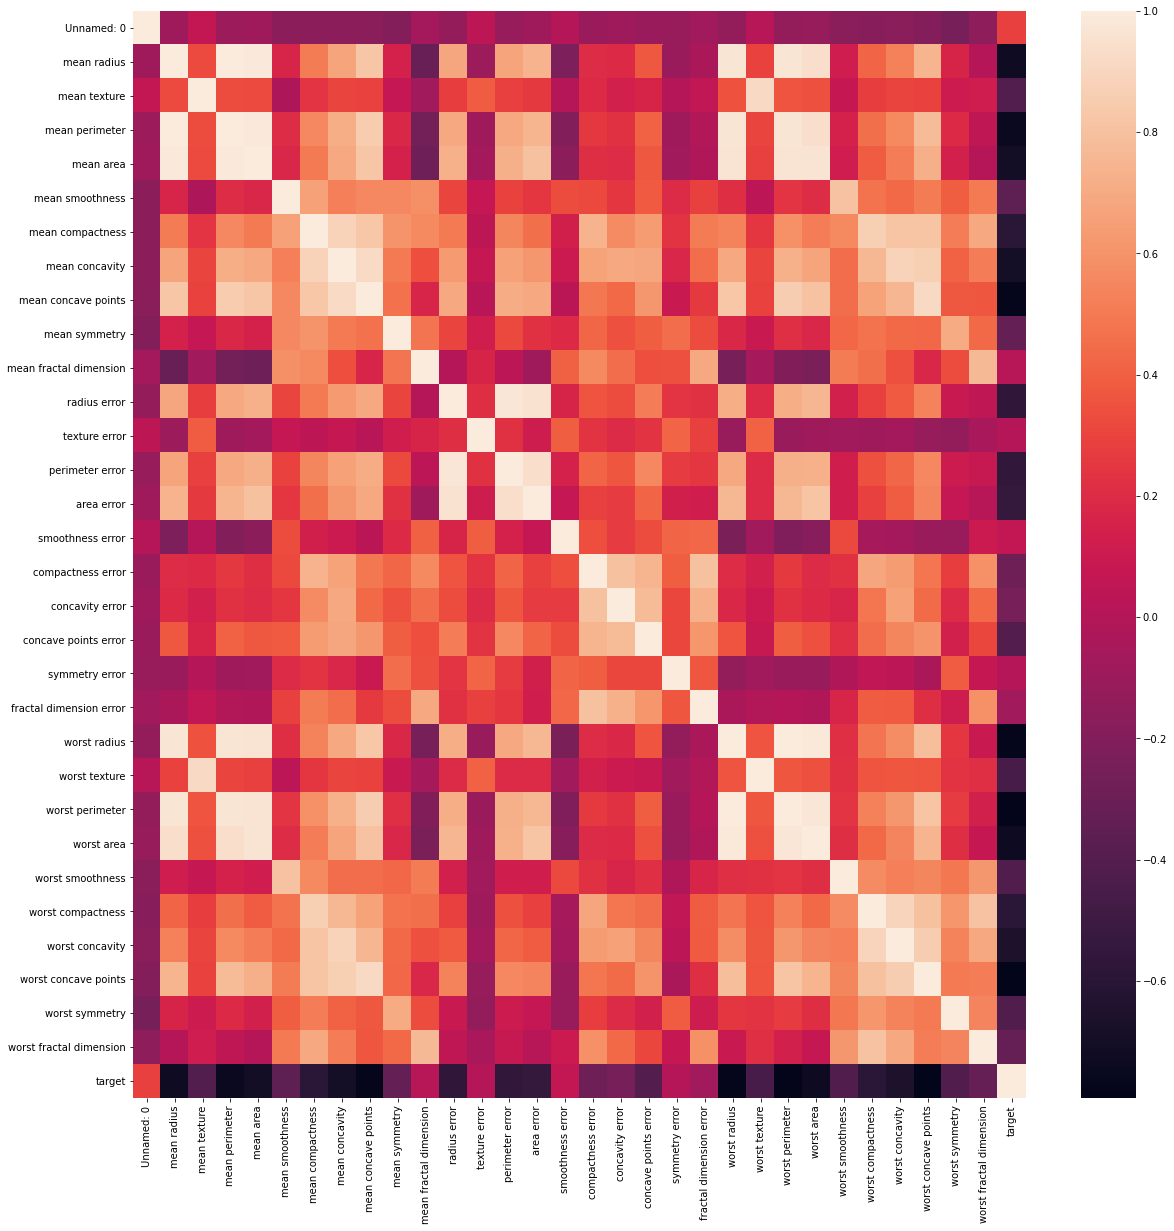

In [51]:
# HEAT MAP USING CORRELATION MATRIX

plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

### Splitting the Data and performing train_test_split

In [15]:
X = new_df.drop(['target'],axis=1)
y = new_df['target']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [18]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((455, 30), (114, 30), (455,), (114,))

### FEATURE SCALING

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

In [21]:
from sklearn.metrics import classification_report,accuracy_score

## SUPPORT VECTOR CLASSIFIER

Without scaled data

In [22]:
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(X_train,y_train)

SVC()

In [23]:
svc_classifier.score(X_test,y_test)

0.9385964912280702

With scaled data

In [24]:
svc_classifier2 = SVC()
svc_classifier2.fit(X_train_sc,y_train)

SVC()

In [25]:
y_pred_sc = svc_classifier.predict(X_test_sc)
accuracy_score(y_pred_sc,y_test)

0.5789473684210527

## LOGISTIC REGRESSION

In [26]:
from sklearn.linear_model import LogisticRegression

Without Scaled Data

In [27]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\sandi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
y_pred = lr.predict(X_test)

In [29]:
accuracy_score(y_pred,y_test)

0.956140350877193

With Scaled Data

In [30]:
lr2 = LogisticRegression()
lr2.fit(X_train_sc,y_train)

LogisticRegression()

In [31]:
lr2_pred2 = lr2.predict(X_test_sc)

In [32]:
accuracy_score(lr2_pred2,y_test)

0.9736842105263158

## K - Nearest Neighbor Classifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier

Without Scaled Data

In [34]:
knc = KNeighborsClassifier()
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [35]:
knc_pred = knc.predict(X_test)

In [36]:
accuracy_score(knc_pred,y_test)

0.9385964912280702

With Scaled Data

In [37]:
knc2=KNeighborsClassifier()
knc2.fit(X_train_sc,y_train)

KNeighborsClassifier()

In [38]:
knc2_pred = knc2.predict(X_test_sc)

In [39]:
accuracy_score(y_test,knc2_pred)

0.956140350877193

## Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

Without Scaled Data

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

In [42]:
rfc_pred = rfc.predict(X_test)

In [43]:
accuracy_score(rfc_pred,y_test)

0.9736842105263158

With Scaled Data

In [44]:
rfc2 = RandomForestClassifier()
rfc2.fit(X_train_sc,y_train)

RandomForestClassifier()

In [45]:
rfc2_pred = rfc2.predict(X_test_sc)

In [46]:
accuracy_score(rfc2_pred,y_test)

0.9649122807017544

### Classification Report of the Model

In [47]:
print(classification_report(lr2_pred2,y_test))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        45
         1.0       1.00      0.96      0.98        69

    accuracy                           0.97       114
   macro avg       0.97      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114

